<a href="https://colab.research.google.com/github/pornnakanok/bsc_dpdm22/blob/main/%5Bdataprep3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html

In [1]:
import pandas as pd

In [2]:
from google.colab import drive # เชื่อมเข้ากับ Drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [3]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data/Data')

!pwd #เช็ค paht ที่กำลังทำงานอยู่
!ls 

/content/drive/MyDrive/bsc_DPDM_data/Data
 Group1_8นราวิชญ์_9ภรณกนก_18ณัฐนิช.csv  'ภรณกนก ภูผาธรรม.csv'


## ใช้ data กรมอุตุ

In [4]:
weather_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/Data/Group1_8นราวิชญ์_9ภรณกนก_18ณัฐนิช.csv')

In [5]:
weather_data.shape

(8169, 20)

In [6]:
weather_data.columns

Index(['จังหวัด', 'สถานี_Pressure', 'สถานี_Humidity', 'สถานี_Dry_bulb',
       'สถานี_Dew_point', 'สถานี_Lowest_temp', 'สถานี_Cloud', 'สถานี_Rain',
       'สถานี_Wind', 'วัน', 'เดือน', 'ปี', 'ความกด', 'ความชื้น',
       'อุณหภูมิตุ้มแห้ง', 'อุณหภูมิจุดน้ำค้าง', 'อุณหภูมิต่ำสุด', 'จำนวนเมฆ',
       'ปริมาณฝน', 'ความเร็วลม'],
      dtype='object')

In [7]:
data_features = weather_data[['ความกด', 'ความชื้น',
       'อุณหภูมิตุ้มแห้ง', 'อุณหภูมิจุดน้ำค้าง', 'อุณหภูมิต่ำสุด', 'จำนวนเมฆ',
       'ปริมาณฝน', 'ความเร็วลม']]
data_features.head()

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,1007.49,86,25.6,22.9,22.1,10,3,3
3,1008.28,80,25.8,21.9,22.8,8,0,2
4,1009.88,86,24.3,21.7,23.1,10,2.2,2


In [8]:
data_features.describe()

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.016946,69.798262,24.868405,18.151916
std,3.224640,8.870501,2.846185,3.775475
min,1002.040000,38.000000,11.800000,1.500000
25%,1010.960000,64.000000,23.300000,15.800000
50%,1012.800000,69.000000,25.300000,18.400000
75%,1015.010000,75.000000,27.000000,21.000000
max,1026.100000,99.000000,31.000000,28.400000


In [9]:
data_features.dtypes

ความกด                float64
ความชื้น                int64
อุณหภูมิตุ้มแห้ง      float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด         object
จำนวนเมฆ               object
ปริมาณฝน               object
ความเร็วลม             object
dtype: object

In [10]:
data_features['ความเร็วลม'] = data_features['ความเร็วลม'].astype(int)

ValueError: ignored

## หาค่าที่เราต้องการ ทุก row ทุก column

In [11]:
data_features[data_features.eq('-').any(1)] #ในตารางถ้าเจอค่าที่เรากำหนด ให้เลือกมาทั้งหมด .any คือเลือกมาทุกคอลัมน์

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
305,1009.88,78,27.9,23.5,24.3,4,-,4
306,1009.47,73,27.5,21.9,23.7,2,-,2
307,1008.08,69,27.3,20.7,22.5,3,-,3
308,1008.35,72,27.1,21.3,22.8,5,-,5
309,1009.30,72,27.0,21.3,23.5,2,-,2
...,...,...,...,...,...,...,...,...
8086,1016.96,62,21.6,13.4,14.8,-,0,2
8092,1014.85,69,22.3,15.9,16.2,-,0,2
8093,1012.80,66,23.3,15.8,16.5,-,0,1
8117,1014.94,68,24.2,17.4,17.8,-,0,2


In [12]:
data_features[data_features['ความเร็วลม'].eq('-')]

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
1079,1012.65,87,25.8,23.5,24.5,-,53.3,-
1122,1011.47,61,28.5,19.7,22.7,-,-,-
2989,1010.46,64,27.1,18.1,21.9,7,0,-
3044,1010.57,97,22.1,21.1,21.5,10,5.6,-
3133,1011.13,74,21.1,14.1,12.9,1,0,-
3440,1015.90,66,21.9,14.5,15.0,-,0,-
3508,1014.73,72,25.6,19.7,20.5,-,-,-
4724,1011.22,75,27.1,21.9,20.0,1,0,-
4950,1008.50,73,25.6,20.2,20,4,0,-
4953,1009.51,89,24.2,22.0,21.1,7,1.2,-


In [16]:
weather_data[weather_data.eq('-').any(1)]

,จังหวัด,สถานี_Pressure,สถานี_Humidity,สถานี_Dry_bulb,สถานี_Dew_point,สถานี_Lowest_temp,สถานี_Cloud,สถานี_Rain,สถานี_Wind,วัน,เดือน,ปี,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
305,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,3,10,2013,1009.88,78,27.9,23.5,24.3,4,-,4
306,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,4,10,2013,1009.47,73,27.5,21.9,23.7,2,-,2
307,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,5,10,2013,1008.08,69,27.3,20.7,22.5,3,-,3
308,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,6,10,2013,1008.35,72,27.1,21.3,22.8,5,-,5
309,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,7,10,2013,1009.30,72,27.0,21.3,23.5,2,-,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,8,12,2021,1016.96,62,21.6,13.4,14.8,-,0,2
8092,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,14,12,2021,1014.85,69,22.3,15.9,16.2,-,0,2
8093,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,15,12,2021,1012.80,66,23.3,15.8,16.5,-,0,1
8117,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,8,1,2022,1014.94,68,24.2,17.4,17.8,-,0,2


In [18]:
weather_data = weather_data[weather_data.eq('-').any(1)==False]
weather_data

,จังหวัด,สถานี_Pressure,สถานี_Humidity,สถานี_Dry_bulb,สถานี_Dew_point,สถานี_Lowest_temp,สถานี_Cloud,สถานี_Rain,สถานี_Wind,วัน,เดือน,ปี,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,1,10,2011,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,2,10,2011,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,3,10,2011,1007.49,86,25.6,22.9,22.1,10,3,3
3,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,4,10,2011,1008.28,80,25.8,21.9,22.8,8,0,2
4,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,5,10,2011,1009.88,86,24.3,21.7,23.1,10,2.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,24,2,2022,1019.23,66,20.3,13.2,14.0,1,0,2
8165,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,25,2,2022,1018.46,68,20.7,14.3,13.9,1,0,2
8166,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,26,2,2022,1016.68,65,22.7,15.2,15.0,0,0,1
8167,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,27,2,2022,1015.31,62,23.8,15.8,17.5,3,0,2


In [19]:
weather_data.shape

(5208, 20)

In [20]:
weather_data = weather_data[weather_data.eq('T').any(1)==False]
weather_data

,จังหวัด,สถานี_Pressure,สถานี_Humidity,สถานี_Dry_bulb,สถานี_Dew_point,สถานี_Lowest_temp,สถานี_Cloud,สถานี_Rain,สถานี_Wind,วัน,เดือน,ปี,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,1,10,2011,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,2,10,2011,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,3,10,2011,1007.49,86,25.6,22.9,22.1,10,3,3
3,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,4,10,2011,1008.28,80,25.8,21.9,22.8,8,0,2
4,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,5,10,2011,1009.88,86,24.3,21.7,23.1,10,2.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,24,2,2022,1019.23,66,20.3,13.2,14.0,1,0,2
8165,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,25,2,2022,1018.46,68,20.7,14.3,13.9,1,0,2
8166,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,26,2,2022,1016.68,65,22.7,15.2,15.0,0,0,1
8167,หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,352201-หนองคาย จ.หนองคาย,353301-เลย สกษ. จ.เลย,27,2,2022,1015.31,62,23.8,15.8,17.5,3,0,2


ตัด row ที่มีค่า - และ T ออก

In [21]:
data_features = data_features[data_features.eq('-').any(1)==False]
data_features

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,1007.49,86,25.6,22.9,22.1,10,3,3
3,1008.28,80,25.8,21.9,22.8,8,0,2
4,1009.88,86,24.3,21.7,23.1,10,2.2,2
...,...,...,...,...,...,...,...,...
8164,1019.23,66,20.3,13.2,14.0,1,0,2
8165,1018.46,68,20.7,14.3,13.9,1,0,2
8166,1016.68,65,22.7,15.2,15.0,0,0,1
8167,1015.31,62,23.8,15.8,17.5,3,0,2


In [22]:
data_features = data_features[data_features.eq('T').any(1)==False]
data_features

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,1007.49,86,25.6,22.9,22.1,10,3,3
3,1008.28,80,25.8,21.9,22.8,8,0,2
4,1009.88,86,24.3,21.7,23.1,10,2.2,2
...,...,...,...,...,...,...,...,...
8164,1019.23,66,20.3,13.2,14.0,1,0,2
8165,1018.46,68,20.7,14.3,13.9,1,0,2
8166,1016.68,65,22.7,15.2,15.0,0,0,1
8167,1015.31,62,23.8,15.8,17.5,3,0,2


In [23]:
data_features.dtypes

ความกด                float64
ความชื้น                int64
อุณหภูมิตุ้มแห้ง      float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด         object
จำนวนเมฆ               object
ปริมาณฝน               object
ความเร็วลม             object
dtype: object

In [32]:
data_features['จำนวนเมฆ'] = data_features['จำนวนเมฆ'].astype(float)
data_features['ปริมาณฝน'] = data_features['ปริมาณฝน'].astype(float)
data_features['อุณหภูมิต่ำสุด'] = data_features['อุณหภูมิต่ำสุด'].astype(float)

<ipython-input-32-614f0324ea1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['จำนวนเมฆ'] = data_features['จำนวนเมฆ'].astype(float)
<ipython-input-32-614f0324ea1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['ปริมาณฝน'] = data_features['ปริมาณฝน'].astype(float)
<ipython-input-32-614f0324ea1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [33]:
data_features.dtypes

ความกด                float64
ความชื้น                int64
อุณหภูมิตุ้มแห้ง      float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด        float64
จำนวนเมฆ              float64
ปริมาณฝน              float64
ความเร็วลม              int64
dtype: object

In [34]:
data_features.describe()

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,1012.731324,70.438253,25.002667,18.420944,19.933570,3.308832,1.556194,2.284726
std,3.158633,9.433792,2.720534,3.630472,3.295887,2.494353,6.816712,1.209540
min,1002.040000,38.000000,11.800000,1.500000,6.800000,0.000000,0.000000,0.000000
25%,1010.760000,64.000000,23.500000,16.100000,17.900000,1.000000,0.000000,1.000000
50%,1012.610000,69.000000,25.400000,18.500000,20.300000,3.000000,0.000000,2.000000
75%,1014.710000,77.000000,26.900000,21.200000,22.500000,5.000000,0.000000,3.000000
max,1026.100000,99.000000,31.000000,28.400000,26.700000,10.000000,112.400000,10.000000


In [11]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=[15,10]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s

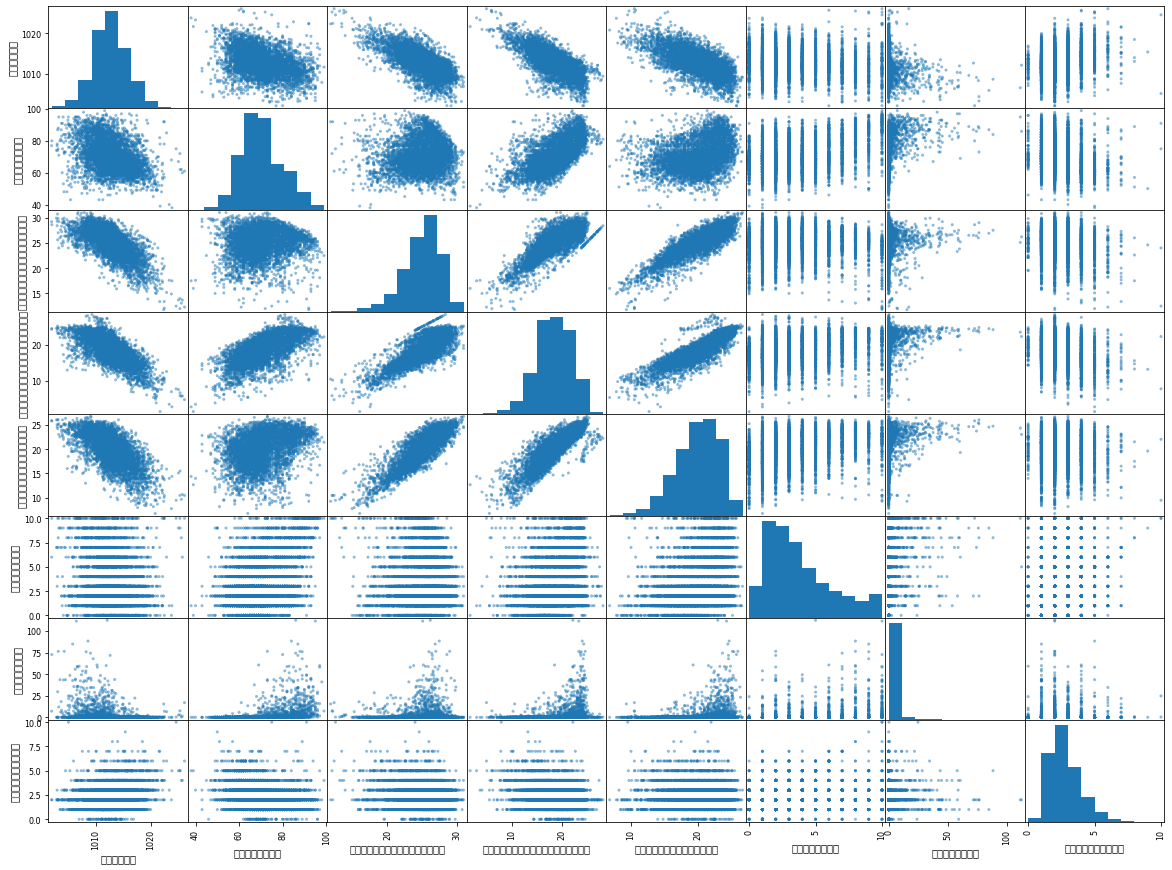

In [38]:
pd.plotting.scatter_matrix(data_features) ;

In [10]:
from matplotlib import pyplot as plt

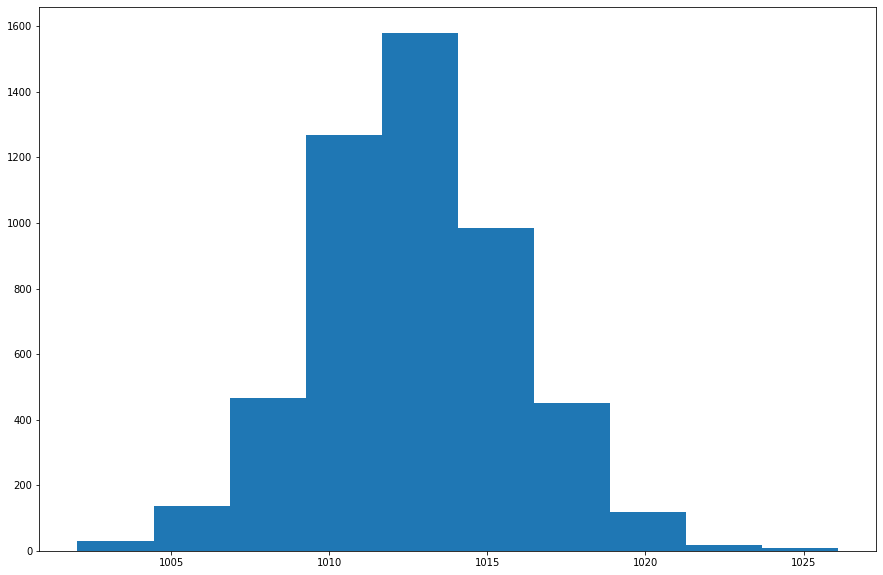

In [49]:
plt.hist(data_features['ความกด']) ;

# Pre-processing

In [9]:
from sklearn import preprocessing

## StandardScaler

In [40]:
#define
scaler = preprocessing.StandardScaler() #ตั้งค่าพารามิเตอร์ ข้างในวงเล็บใส่พารามิเตอร์ได้
#train
scaler.fit(data_features) #เอาที่เราตั้งค่ามา fit กับข้อมูลของเรา คือ สร้างโมเดลจาก data 
#predict-transform
data_features_d_s = scaler.transform(data_features) #เอาโมเดลมาใช้งาน ไม่ได้เอาไปทำนาย data ใหม่ เป็น transform

In [41]:
data_features_d_s

array([[-2.29910857,  1.33170074,  0.95480871, ...,  2.28184617,
        -0.02291572,  0.5914187 ],
       [-1.92549238,  2.28581221,  0.21958617, ...,  2.68279133,
         2.36850273, -0.23542385],
       [-1.65952832,  1.64973789,  0.21958617, ...,  2.68279133,
         0.21182474,  0.5914187 ],
       ...,
       [ 1.25024518, -0.57652221, -0.8464865 , ..., -1.32666027,
        -0.22831362, -1.06226641],
       [ 0.81647046, -0.89455937, -0.44211411, ..., -0.12382479,
        -0.22831362, -0.23542385],
       [ 0.10406672, -0.57652221,  0.14606392, ..., -0.52476995,
        -0.22831362, -0.23542385]])

(array([  29.,  136.,  466., 1269., 1579.,  986.,  450.,  118.,   19.,
           9.]),
 array([-3.3851285 , -2.62333143, -1.86153436, -1.09973729, -0.33794022,
         0.42385684,  1.18565391,  1.94745098,  2.70924805,  3.47104512,
         4.23284218]),
 <a list of 10 Patch objects>)

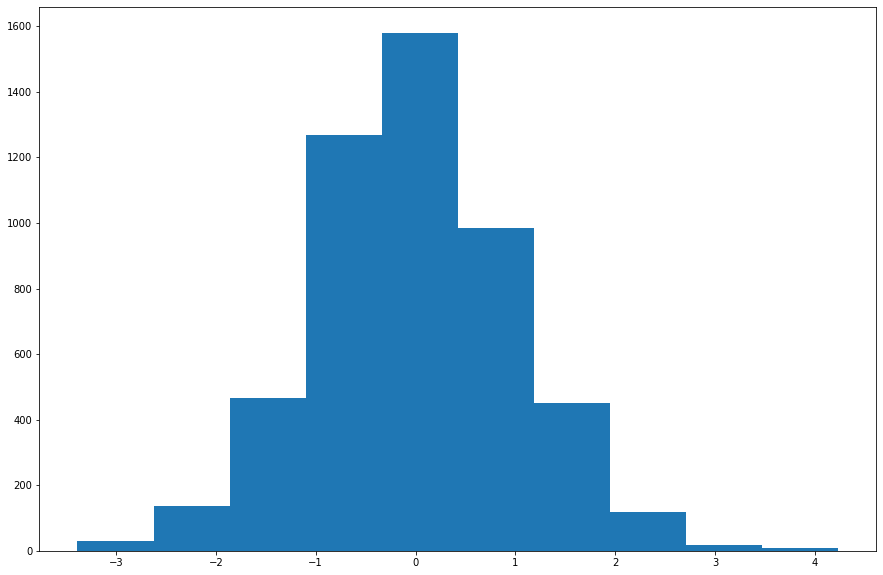

In [50]:
plt.hist(data_features_d_s[:,0])

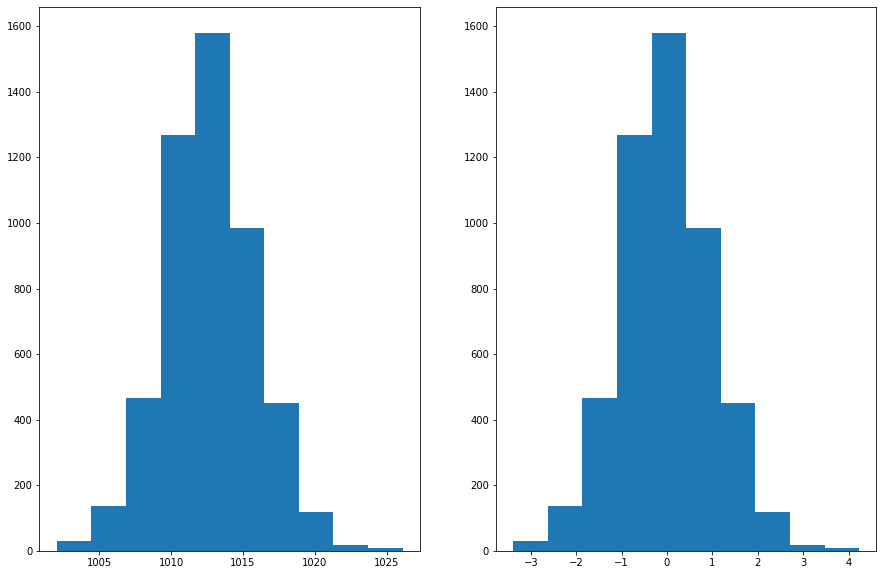

In [51]:
plt.subplot(1,2,1)
plt.hist(data_features['ความกด']) 
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,0]) ;

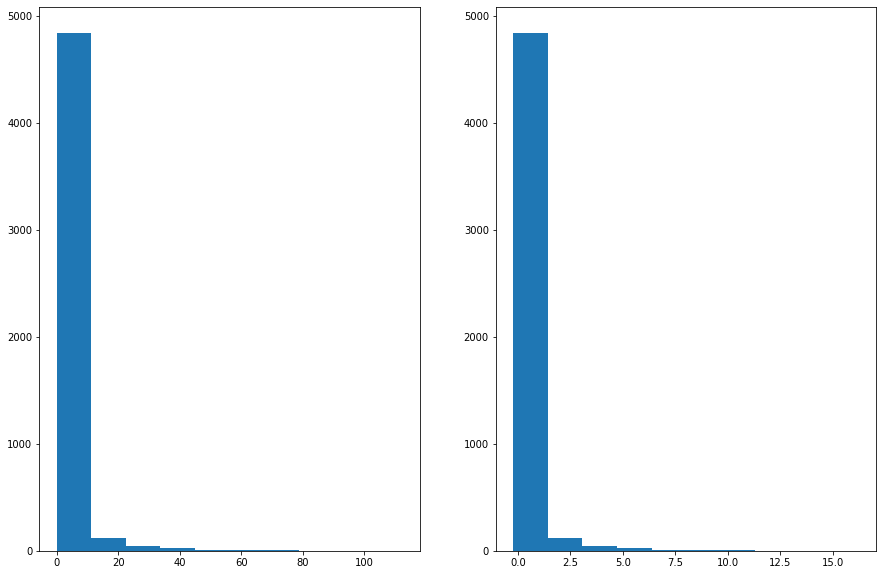

In [53]:
plt.subplot(1,2,1)
plt.hist(data_features['ปริมาณฝน']) 
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,6]) ;

## Min-max normalization
ปรับให้ค่าสูงสุดต่ำสุดอยู่ในช่วง 0-1

In [54]:
#define
scaler = preprocessing.MinMaxScaler() #ตั้งค่าพารามิเตอร์ ข้างในวงเล็บใส่พารามิเตอร์ได้
#train
scaler.fit(data_features) #เอาที่เราตั้งค่ามา fit กับข้อมูลของเรา คือ สร้างโมเดลจาก data 
#predict-transform
data_features_d_norm = scaler.transform(data_features) #เอาโมเดลมาใช้งาน ไม่ได้เอาไปทำนาย data ใหม่ เป็น transform

In [55]:
data_features_d_norm

array([[0.14256027, 0.73770492, 0.82291667, ..., 0.9       , 0.01245552,
        0.3       ],
       [0.19160432, 0.8852459 , 0.71875   , ..., 1.        , 0.15747331,
        0.2       ],
       [0.22651704, 0.78688525, 0.71875   , ..., 1.        , 0.02669039,
        0.3       ],
       ...,
       [0.6084788 , 0.44262295, 0.56770833, ..., 0.        , 0.        ,
        0.1       ],
       [0.55153782, 0.39344262, 0.625     , ..., 0.3       , 0.        ,
        0.2       ],
       [0.45802161, 0.44262295, 0.70833333, ..., 0.2       , 0.        ,
        0.2       ]])

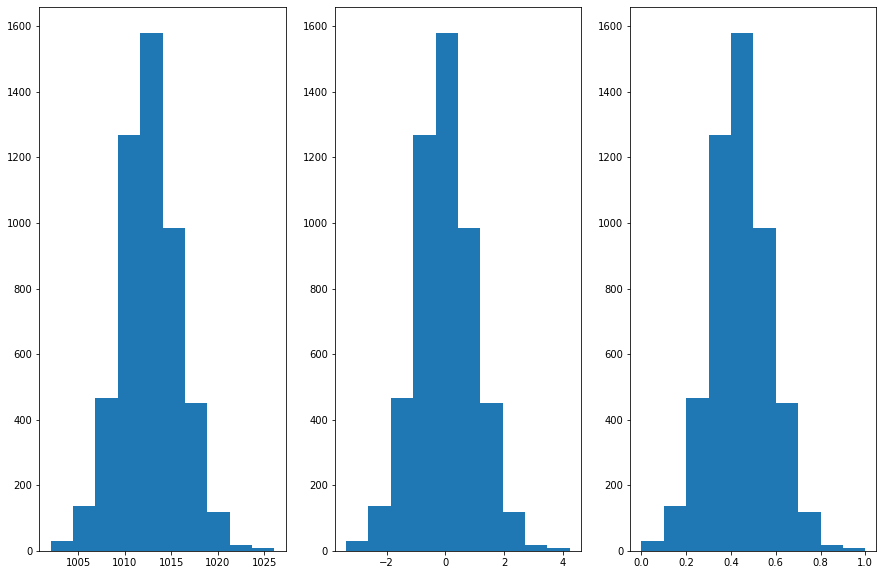

In [56]:
plt.subplot(1,3,1)
plt.hist(data_features['ความกด']) 
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,0]) 
plt.subplot(1,3,3)
plt.hist(data_features_d_norm[:,0]) ;

# Data บ้าน

## Discritization

In [1]:
import pandas as pd

In [2]:
from google.colab import drive # เชื่อมเข้ากับ Drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [3]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data/Data')

!pwd #เช็ค paht ที่กำลังทำงานอยู่
!ls 

/content/drive/MyDrive/bsc_DPDM_data/Data
 Group1_8นราวิชญ์_9ภรณกนก_18ณัฐนิช.csv   h.csv  'ภรณกนก ภูผาธรรม.csv'


In [4]:
home_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/Data/h.csv')
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4


In [5]:
home_data.columns

Index(['post_id', 'number_of_rai', 'number_of_ngan', 'number_of_va',
       'number_of_story', 'number_of_bedroom', 'number_of_bathroom',
       'direction', 'furniture', 'usable_area', 'number_of_parking',
       'project_name', 'district', 'zone', 'street', 'sell_price', 'd250-7/11',
       'd500-7/11', 'd750-7/11', 'd1000-7/11', 'd1250-7/11', 'd1500-7/11'],
      dtype='object')

In [6]:
home_data = home_data.dropna(subset=['sell_price'])

In [7]:
from matplotlib import pyplot as plt

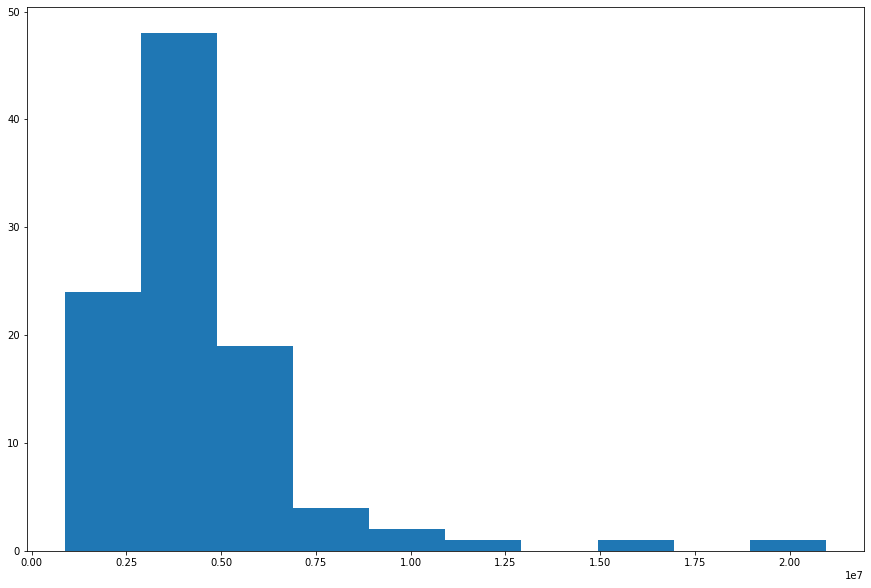

In [12]:
plt.hist(home_data['sell_price']) ;

### แปลงค่า sell_price 
- ราคาต่ำกว่า 5m ให้เป็น 1
- ราคาระหว่าง 5m-10m ให้เป็น 2
- ราคา 10m ขึ้นไป ให้เป็น 3

In [26]:
home_1 = home_data[home_data['sell_price'] <= 5000000]
home_1

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
9,656.0,NaN,NaN,60.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ในเมือง-รื่นรมย์-เทพารักษ์,NaN,4070000.0,0,0,1,2,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,19483.0,0.0,0.0,59.9,2.0,0.0,0.0,0.0,0.0,255.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,4235000.0,0,0,3,6,9,11
93,19492.0,0.0,0.0,90.3,2.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4707000.0,0,0,2,3,4,7
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4


In [27]:
home_1.insert(22,'price_class','1')
home_1.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,price_class
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,1
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,1
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,1
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4,1
9,656.0,NaN,NaN,60.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ในเมือง-รื่นรมย์-เทพารักษ์,NaN,4070000.0,0,0,1,2,4,8,1


In [32]:
home_2 = home_data[(home_data['sell_price'] > 5000000) & (home_data['sell_price'] <= 10000000)]
home_2

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
5,568.0,NaN,1.0,25.7,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,5720000.0,0,0,0,0,2,3
6,597.0,NaN,2.0,88.4,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,NaN,เหล่านาดี,5712000.0,0,1,1,1,1,1
7,624.0,NaN,NaN,98.9,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,รอบบึง,5280000.0,0,0,0,0,2,4
32,2143.0,0.0,0.0,65.0,2.0,4.0,3.0,1.0,2.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,ถนนรอบบึง,5200000.0,0,1,1,1,4,6
46,5986.0,0.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ถนนชวนชื่น,9680000.0,0,2,3,8,11,15
47,5994.0,0.0,0.0,79.0,2.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,ม.ภาค-บ้านกอก-บึงหนองโคตร,ถนนมิตรภาพ,6820000.0,1,1,1,3,5,7
48,6003.0,0.0,0.0,98.0,2.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,ซ.หมู่บ้านพิมานชล กลันตา ถนนรอบบึง,5500000.0,0,0,0,1,2,5
59,7713.0,0.0,0.0,81.4,2.0,0.0,0.0,5.0,0.0,235.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,รอบบึงแก่นนคร,6100000.0,1,1,1,3,6,8
60,7733.0,0.0,0.0,70.0,2.0,4.0,4.0,1.0,3.0,200.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,5100000.0,1,2,2,4,5,5


In [33]:
home_2.insert(22,'price_class','2')
home_2.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,price_class
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3,2
5,568.0,NaN,1.0,25.7,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,5720000.0,0,0,0,0,2,3,2
6,597.0,NaN,2.0,88.4,NaN,0.0,NaN,0.0,0.0,0.0,...,NaN,เหล่านาดี,5712000.0,0,1,1,1,1,1,2
7,624.0,NaN,NaN,98.9,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,รอบบึง,5280000.0,0,0,0,0,2,4,2
32,2143.0,0.0,0.0,65.0,2.0,4.0,3.0,1.0,2.0,0.0,...,โนนทัน-บึงแก่นนคร,ถนนรอบบึง,5200000.0,0,1,1,1,4,6,2


In [35]:
home_3 = home_data[home_data['sell_price'] > 10000000]

In [36]:
home_3.insert(22,'price_class','3')
home_3.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,price_class
8,634.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,เหล่านาดี-บ้านสะอาด-บ้านโจด,เหล่านาดี,10263000.0,0,0,1,5,7,11,3
40,3622.0,0.0,1.0,69.0,2.0,4.0,4.0,0.0,3.0,900.0,...,โนนทัน-บึงแก่นนคร,NaN,12500000.0,0,1,1,1,4,6,3
45,5978.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,ถนนกลางเมือง,20949000.0,0,1,2,5,5,7,3
73,12759.0,0.0,1.0,58.0,2.0,5.0,3.0,1.0,3.0,300.0,...,โนนทัน-บึงแก่นนคร,NaN,16500000.0,0,0,1,3,6,8,3


In [37]:
home_final = pd.concat([home_1,home_2,home_3]) 
home_final

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,price_class
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,1
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,1
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,1
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4,1
9,656.0,NaN,NaN,60.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ในเมือง-รื่นรมย์-เทพารักษ์,NaN,4070000.0,0,0,1,2,4,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9,2
8,634.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,เหล่านาดี-บ้านสะอาด-บ้านโจด,เหล่านาดี,10263000.0,0,0,1,5,7,11,3
40,3622.0,0.0,1.0,69.0,2.0,4.0,4.0,0.0,3.0,900.0,...,โนนทัน-บึงแก่นนคร,NaN,12500000.0,0,1,1,1,4,6,3
45,5978.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,ถนนกลางเมือง,20949000.0,0,1,2,5,5,7,3


In [38]:
def filter(x):
    if x < 5000000 :
      return '1'
    if x > 10000000:
      return '3'

In [39]:
home_data['new_class'] = home_data['sell_price'].apply(filter)
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,new_class
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,1
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,1
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3,None
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,1
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14,None
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9,None
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9,1
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4,1


# One-hot Encoder

In [41]:
home_data_dummies = pd.get_dummies(home_data,columns=['zone'])

In [42]:
.home_data_dummies

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_บ้านเป็ด-โคกฟันโปง,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_มะลิวัลย์-ร.8-สนามบิน,zone_ศิลา-โกทา-หนองไผ่-บ้านดอน,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,0,0,0,0,0,0,0,1,0,0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,0,0,0,0,0,0,0,0,0,0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,0,0,0,0,0,1,0,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,0,0,0,0,0,0,0,0,1,0
